In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [9]:
df= pd.read_csv('KSI.csv', parse_dates= ['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16093 entries, 0 to 16092
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   X              16093 non-null  float64            
 1   Y              16093 non-null  float64            
 2   Index_         16093 non-null  int64              
 3   ACCNUM         16093 non-null  int64              
 4   YEAR           16093 non-null  int64              
 5   DATE           16093 non-null  datetime64[ns, UTC]
 6   TIME           16093 non-null  int64              
 7   HOUR           16093 non-null  int64              
 8   STREET1        16093 non-null  object             
 9   STREET2        14698 non-null  object             
 10  OFFSET         2388 non-null   object             
 11  ROAD_CLASS     15725 non-null  object             
 12  District       16080 non-null  object             
 13  WardNum        13795 non-null  float64        

In [10]:
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df_clean = df.replace(' ', np.nan, regex=False)
#df_clean['WEEKDAY']= df_clean['WEEKDAY'].astype('str')

In [11]:
print(df_clean.isna().sum()/len(df_clean)*100)

X                 0.000000
Y                 0.000000
Index_            0.000000
ACCNUM            0.000000
YEAR              0.000000
DATE              0.000000
TIME              0.000000
HOUR              0.000000
STREET1           0.000000
STREET2           8.668365
OFFSET           85.161250
ROAD_CLASS        2.286709
District          0.080780
WardNum          14.279500
Division          0.000000
LATITUDE          0.000000
LONGITUDE         0.000000
LOCCOORD          0.807805
ACCLOC           33.865656
TRAFFCTL          0.180203
VISIBILITY        0.136705
LIGHT             0.000000
RDSFCOND          0.167775
ACCLASS           0.000000
IMPACTYPE         0.024856
INVTYPE           0.062139
INVAGE            0.000000
INJURY            9.998136
FATAL_NO         95.818058
INITDIR          30.050332
VEHTYPE          15.702479
MANOEUVER        43.198906
DRIVACT          50.090101
DRIVCOND         50.090101
PEDTYPE          84.030324
PEDACT           84.067607
PEDCOND          83.321941
C

In [12]:
# Dropping the columns with more than 80% Nan values
df_clean = df_clean.drop(['OFFSET', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND'], axis=1)

In [13]:
year = [year for year,df in df_clean.groupby('year')]
ACCNUM_year = df_clean.groupby('year')['ACCNUM'].nunique()
fig = px.bar(df_clean, x = year, y = ACCNUM_year, labels={'x':'Year','y':'Number of Accidents'})
fig.show()

In [14]:
month1 = [month1 for month1,df in df_clean.groupby('month')]

ACCNUM_month = df_clean.groupby('month')['ACCNUM'].nunique()
month = df_clean['month'].unique()

fig = px.bar(df_clean, x = month1, y = ACCNUM_month, labels={'x':'Month','y':'Number of Accidents'})
fig.show()

In [15]:
df_clean['ACCLASS'].unique()

array(['Non-Fatal Injury', 'Fatal'], dtype=object)

In [16]:
x=df_clean['year'].unique()

fig = go.Figure(data=[
    go.Bar(name='Non-Fatal', x=x, y= df_clean[df_clean['ACCLASS']== 'Non-Fatal Injury'].groupby('year')['Index_'].nunique()),
    go.Bar(name='Fatal', x=x, y= df_clean[df_clean['ACCLASS']== 'Fatal'].groupby('year')['Index_'].nunique())])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [17]:
year = [year for year,df in df_clean.groupby('year')]
fig = px.bar(df_clean, x = year, y = df_clean[df_clean['ACCLASS']== 'Fatal'].groupby('year')['Index_'].nunique(), labels={'x':'Year','y':'Number of Injuries=Fatal'})
fig.update_traces(marker_color='red')
fig.show()

In [18]:
district = [district for district,df in df_clean.groupby('District')]
fig = px.bar(df_clean, x = district, y = df_clean['District'].value_counts(), labels={'x':'','y':'Number of Accidents'})
colors = ['green'] * 4
colors[0] = 'red'
colors[1] = 'blue'
colors[3] = 'gray'
fig.update_traces(marker_color=colors)
fig.show()

In [19]:
fig = px.bar(df_clean, x = df_clean['Neighbourhood'].value_counts().index , y = df_clean['Neighbourhood'].value_counts(), labels={'x':'Neighbourhood','y':'Number of Accidents'})
fig.show()

In [20]:
df_clean['CYCLIST'].unique()

array([nan, 'Yes'], dtype=object)

In [21]:
df_clean['CYCLIST']= df_clean['CYCLIST'].astype('str')

In [22]:
a=['Yes']
b=['nan']
for i in a:
    df_clean['CYCLIST'] = df_clean['CYCLIST'].apply(lambda x: x.replace(i,'1'))
    
for i in b:
    df_clean['CYCLIST'] = df_clean['CYCLIST'].apply(lambda x: x.replace(i,'0'))

In [23]:
df_clean['CYCLIST']= df_clean['CYCLIST'].astype('int')
df_clean['CYCLIST'].unique()

array([0, 1])

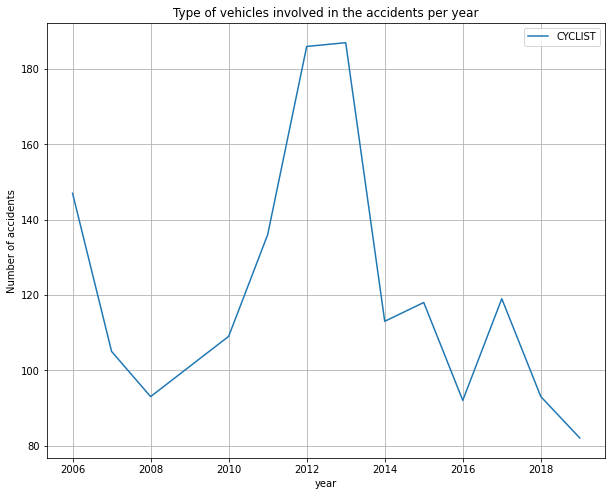

In [24]:
vehicle_data=df_clean.pivot_table(index='year',margins=False,values=['CYCLIST'],aggfunc=np.sum)

vehicle_data.plot(figsize=(10,8), title="Type of vehicles involved in the accidents per year", grid=True)
plt.ylabel('Number of accidents')
plt.show()
